<a href="https://colab.research.google.com/github/anambrito/IC-Inteligencia-Computacional/blob/main/Keras_MNIST_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Handwritten Image Detection with Keras using MNIST data

In this exercise we will work with image data: specifically the famous MNIST data set.  This data set contains 70,000 images of handwritten digits in grayscale (0=black, 255 = white).  The images are 28 pixels by 28 pixels for a total of 784 pixels.  This is quite small by image standards.  Also, the images are well centered and isolated.  This makes this problem solvable with standard fully connected neural nets without too much pre-work.

In the first part of this notebook, we will walk you through loading in the data, building a network, and training it.  Then it will be your turn to try different models and see if you can improve performance

In [1]:
# Preliminaries

from __future__ import print_function

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Let's explore the dataset a little bit

In [2]:
# Load the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
x_train[0].shape

(28, 28)

In [4]:
#Let's just look at a particular example to see what is inside

x_train[333]  ## Just a 28 x 28 numpy array of ints from 0 to 255

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  87, 138,
        170, 253, 201, 244, 212, 222, 138,  86,  22,   0,   0,   0,   0,
          0,   0],
       [  

In [5]:
# What is the corresponding label in the training set?
y_train[333]

8

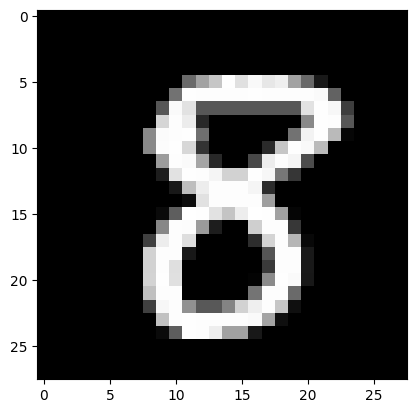

In [6]:
# Let's see what this image actually looks like

plt.imshow(x_train[333], cmap='Greys_r')

In [7]:
# this is the shape of the np.array x_train
# it is 3 dimensional.
print(x_train.shape, 'train samples')
print(x_test.shape, 'test samples')

(60000, 28, 28) train samples
(10000, 28, 28) test samples


In [8]:
## For our purposes, these images are just a vector of 784 inputs, so let's convert
x_train = x_train.reshape(len(x_train), 28*28)
x_test = x_test.reshape(len(x_test), 28*28)

## Keras works with floats, so we must cast the numbers to floats
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

## Normalize the inputs so they are between 0 and 1
x_train /= 255
x_test /= 255


In [9]:
# convert class vectors to binary class matrices
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

y_train[333]  # now the digit k is represented by a 1 in the kth entry (0-indexed) of the length 10 vector

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

In [10]:
# We will build a model with two hidden layers of size 512
# Fully connected inputs at each layer
# We will use dropout of .2 to help regularize
model_1 = Sequential()
model_1.add(Dense(64, activation='relu', input_shape=(784,)))
model_1.add(Dropout(0.2))
model_1.add(Dense(64, activation='relu'))
model_1.add(Dropout(0.2))
model_1.add(Dense(10, activation='softmax'))

In [11]:
## Note that this model has a LOT of parameters
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


In [12]:
# Let's compile the model
learning_rate = .001
model_1.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=learning_rate),
              metrics=['accuracy'])
# note that `categorical cross entropy` is the natural generalization 
# of the loss function we had in binary classification case, to multi class case

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [13]:
# And now let's fit.

batch_size = 128  # mini-batch with 128 examples
epochs = 30
history = model_1.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test))

Epoch 1/30
469/469 [==============================] - 3s 5ms/step - loss: 0.5123 - accuracy: 0.8465 - val_loss: 0.2051 - val_accuracy: 0.9387
Epoch 2/30
469/469 [==============================] - 2s 4ms/step - loss: 0.2509 - accuracy: 0.9263 - val_loss: 0.1491 - val_accuracy: 0.9559
Epoch 3/30
469/469 [==============================] - 2s 4ms/step - loss: 0.1987 - accuracy: 0.9408 - val_loss: 0.1251 - val_accuracy: 0.9642
Epoch 4/30
469/469 [==============================] - 2s 4ms/step - loss: 0.1704 - accuracy: 0.9498 - val_loss: 0.1178 - val_accuracy: 0.9651
Epoch 5/30
469/469 [==============================] - 2s 4ms/step - loss: 0.1518 - accuracy: 0.9555 - val_loss: 0.1148 - val_accuracy: 0.9682
Epoch 6/30
469/469 [==============================] - 3s 5ms/step - loss: 0.1429 - accuracy: 0.9579 - val_loss: 0.1063 - val_accuracy: 0.9689
Epoch 7/30
469/469 [==============================] - 2s 4ms/step - loss: 0.1319 - accuracy: 0.9602 - val_loss: 0.0995 - val_accuracy: 0.9704
Epoch 

In [14]:
## We will use Keras evaluate function to evaluate performance on the test set

score = model_1.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.10861892998218536
Test accuracy: 0.9757000207901001


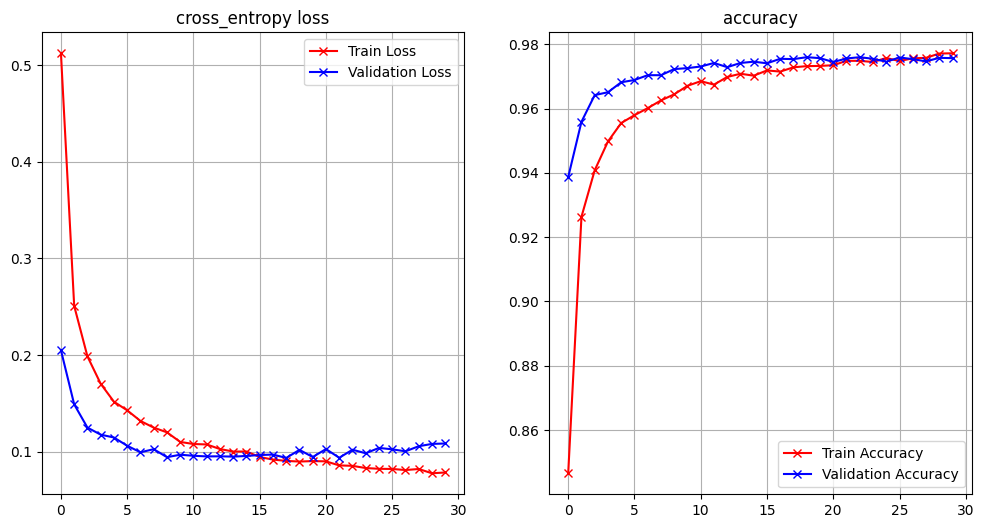

In [15]:
def plot_loss_accuracy(history):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history["loss"],'r-x', label="Train Loss")
    ax.plot(history.history["val_loss"],'b-x', label="Validation Loss")
    ax.legend()
    ax.set_title('cross_entropy loss')
    ax.grid(True)


    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history.history["accuracy"],'r-x', label="Train Accuracy")
    ax.plot(history.history["val_accuracy"],'b-x', label="Validation Accuracy")
    ax.legend()
    ax.set_title('accuracy')
    ax.grid(True)
    

plot_loss_accuracy(history)

This is reasonably good performance, but we can do even better!  Next you will build an even bigger network and compare the performance.

## Exercise
### Your Turn: Build your own model
Use the Keras "Sequential" functionality to build `model_2` with the following specifications:

1. Two hidden layers.
2. First hidden layer of size 400 and second of size 300
3. Dropout of .4 at each layer
4. How many parameters does your model have?  How does it compare with the previous model?
4. Train this model for 20 epochs with RMSProp at a learning rate of .001 and a batch size of 128




In [31]:
### Build your model here

## camada 1 oculta com 400 nodes 
## camada 2 oculta com 300 nodes

model_2 = Sequential([
    Dense(400,  activation='relu', input_shape=(784,)),
    Dropout(0.4),
    Dense(300, activation='relu' ),
    Dropout(0.4),
    Dense(10, activation = "softmax")
])

model_2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 400)               314000    
                                                                 
 dropout_8 (Dropout)         (None, 400)               0         
                                                                 
 dense_13 (Dense)            (None, 300)               120300    
                                                                 
 dropout_9 (Dropout)         (None, 300)               0         
                                                                 
 dense_14 (Dense)            (None, 10)                3010      
                                                                 
Total params: 437,310
Trainable params: 437,310
Non-trainable params: 0
_________________________________________________________________


Em comparação ao modelo anterior, o model_2 teve aproximadamente, 8 vezes mais parametros. Isso significa que o model_2 tem poder de que descrever uma função mais complexa. 

In [32]:
model_2.compile(RMSprop(learning_rate = 0.001), "categorical_crossentropy", metrics=["accuracy"])

In [33]:
history_2 = model_2.fit(x_train, y_train, batch_size=128, epochs=20, verbose = 1, validation_data=(x_test, y_test))

Epoch 1/20
469/469 [==============================] - 7s 14ms/step - loss: 0.3262 - accuracy: 0.9001 - val_loss: 0.1242 - val_accuracy: 0.9617
Epoch 2/20
469/469 [==============================] - 7s 16ms/step - loss: 0.1501 - accuracy: 0.9551 - val_loss: 0.1026 - val_accuracy: 0.9670
Epoch 3/20
469/469 [==============================] - 7s 14ms/step - loss: 0.1187 - accuracy: 0.9649 - val_loss: 0.0852 - val_accuracy: 0.9758
Epoch 4/20
469/469 [==============================] - 7s 16ms/step - loss: 0.1000 - accuracy: 0.9697 - val_loss: 0.0801 - val_accuracy: 0.9775
Epoch 5/20
469/469 [==============================] - 6s 13ms/step - loss: 0.0927 - accuracy: 0.9737 - val_loss: 0.0709 - val_accuracy: 0.9793
Epoch 6/20
469/469 [==============================] - 8s 17ms/step - loss: 0.0841 - accuracy: 0.9759 - val_loss: 0.0731 - val_accuracy: 0.9817
Epoch 7/20
469/469 [==============================] - 7s 14ms/step - loss: 0.0764 - accuracy: 0.9783 - val_loss: 0.0860 - val_accuracy: 0.9784

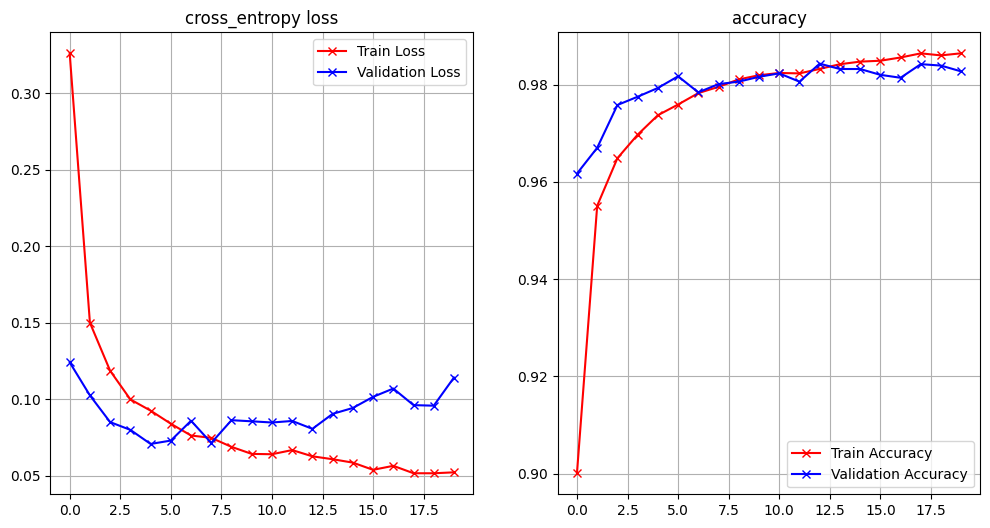

In [42]:
plot_loss_accuracy(history_2)

## Think about the following questions

1) How do model_1 and model_2 compare? Which do you prefer? If you were going to put one into production, which would you choose and why?

2) Compare the trajectories of the loss function on the training set and test set for each model? How do they compare? What does that suggest about each model? Do the same for accuracy? Which do you think is more meaningful, the loss or the accuracy?

3) Suggest an improvement to one of the models (changing structure, learning rate, number of epochs, etc.) that you think will result in a better model. Try it out below? Did it improve the performance?

1) O model_1 é o melhor modelo para treinar, pois não apresenta overfitting e é mais rápido de executar pois têm menos parâmetros. Em contra partida, o modelo 2 é melhor na execução de classificação de dados de teste fora do treino. Dessa forma, escolhemos o modelo 2 para colocar em produção.

2) model_1: No primeiro modelo, é perceptível através do gráfico de custo (cross_entropy loss), que após a décima nona época, o modelo começa a apresentar overfitting, o que não é perceptível de imediato no gráfico de acurácia. Sendo assim, o melhor gráfico para verificar quando se deve encerrar o treino, é o gráfico de custo do modelo. 

model_2: No segundo modelo, é notável que a taxa de overfitting é alta e a taxa de acurácia é mais alta que o modelo 1. Dessa forma, neste momento o gráfico de acurácia é mais relevante. 

In [50]:
### Build your model here

## camada 1 oculta com 400 nodes 
## camada 2 oculta com 300 nodes

model_3 = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dropout(0.2),
    Dense(64, activation='relu' ),
    Dropout(0.2),
    Dense(128, activation='relu' ),
    Dropout(0.2),
    Dense(10, activation = "softmax")
])

model_3.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 128)               100480    
                                                                 
 dropout_12 (Dropout)        (None, 128)               0         
                                                                 
 dense_25 (Dense)            (None, 64)                8256      
                                                                 
 dropout_13 (Dropout)        (None, 64)                0         
                                                                 
 dense_26 (Dense)            (None, 128)               8320      
                                                                 
 dropout_14 (Dropout)        (None, 128)               0         
                                                                 
 dense_27 (Dense)            (None, 10)               

In [51]:
model_3.compile(RMSprop(learning_rate = 0.001), "categorical_crossentropy", metrics=["accuracy"])

In [52]:
history_3 = model_3.fit(x_train, y_train, batch_size=128, epochs=30, verbose = 1, validation_data=(x_test, y_test))

Epoch 1/30
469/469 [==============================] - 4s 7ms/step - loss: 0.4434 - accuracy: 0.8651 - val_loss: 0.1731 - val_accuracy: 0.9457
Epoch 2/30
469/469 [==============================] - 3s 7ms/step - loss: 0.2001 - accuracy: 0.9425 - val_loss: 0.1155 - val_accuracy: 0.9646
Epoch 3/30
469/469 [==============================] - 5s 11ms/step - loss: 0.1552 - accuracy: 0.9554 - val_loss: 0.1002 - val_accuracy: 0.9701
Epoch 4/30
469/469 [==============================] - 3s 7ms/step - loss: 0.1281 - accuracy: 0.9627 - val_loss: 0.0963 - val_accuracy: 0.9728
Epoch 5/30
469/469 [==============================] - 3s 6ms/step - loss: 0.1147 - accuracy: 0.9656 - val_loss: 0.0907 - val_accuracy: 0.9754
Epoch 6/30
469/469 [==============================] - 3s 7ms/step - loss: 0.1045 - accuracy: 0.9699 - val_loss: 0.0870 - val_accuracy: 0.9760
Epoch 7/30
469/469 [==============================] - 4s 9ms/step - loss: 0.0957 - accuracy: 0.9722 - val_loss: 0.0981 - val_accuracy: 0.9740
Epoch

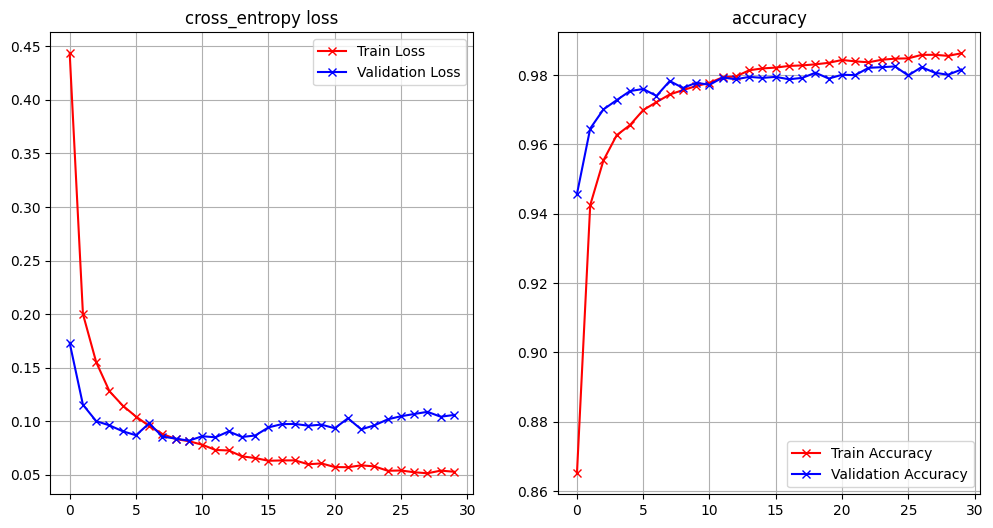

In [53]:
plot_loss_accuracy(history_3)

Neste novo modelo, com alterações na estrutura neural, usando o estilo convolucional, o que gera menos parâmetros em relação ao modelo 2, foi possível alcançar uma acurácia de validação na mesma faixa que o model_2 e uma acurácia de treino maior que o model_1.